In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Change this to whatever the data file is.

# The data file should be a csv (windows csv, if exporting from excel) with the first row being
# titles.

data_file = "eco liposomes.csv"

In [8]:
df = pd.read_csv(data_file);

In [11]:
# Prints the keys for each data column.

a = df.keys()

for key in df.keys():
    print key

Time
10 mM Gdm, pH 7.5, sorbitol
2.5 mM MeGdm, pH 7.6, sorbitol
5 mM MeGdm, pH 7.6, sorbitol
2.5 mM Arg, pH 7.5, sorbitol
5 mM Arg, pH 7.5, sorbitol
12.5 mM Arg, pH 7.5, NaCl
2.5 mM EtGdm, pH 7.55, NaCl
5 mM EtGdm, pH 7.55, NaCl
5 mM EtGdm, pH 7.55, NaCl.1
2.5 Amino Gdm, pH 7.4, NaCl
2.5 Amino Gdm, pH 7.4, sorbitol


In [15]:
# Change this to whaver the key for the independent variable (x axis) is

x_key = 'Time'

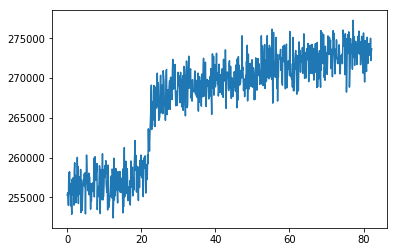

In [16]:
plt.plot(df[x_key], df[a[1]])

Text(0.5,0,u'Time (s)')

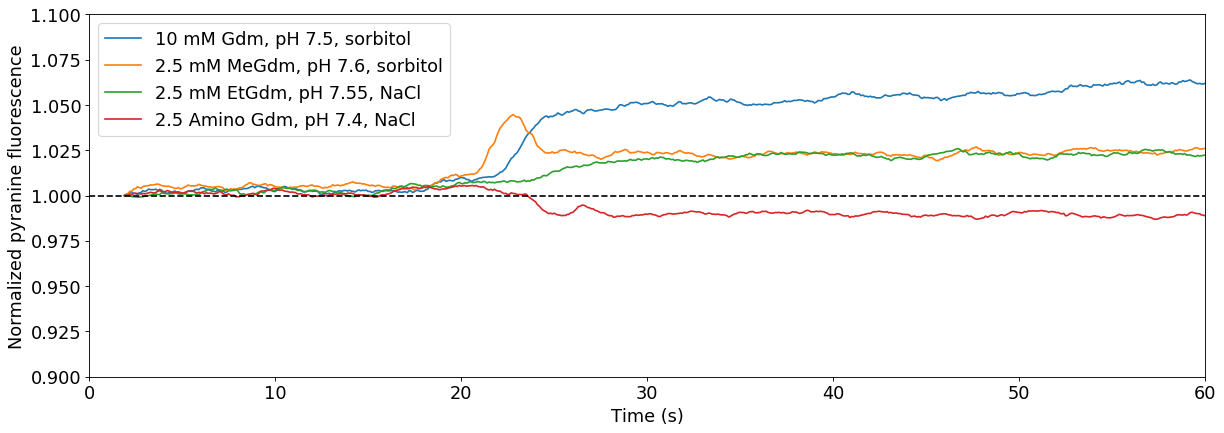

In [17]:
# Meat of the analysis. Window is used in the rolling average. 

window = 20

#df_norm = df.rolling(window=window, center=False).mean() / df.rolling(window=window, center=False).mean().max()
df_norm = df.rolling(window=window, center=False).mean() / df.rolling(window=window, center=False).mean().loc[window-1]

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

legends = []
plt.rcParams.update({'font.size': 16})

keys = df_norm.keys()

# this list holds the 
i = [1,2,7,10]
for key in [keys[z] for z in i]:
    plt.plot(df['Time'], df_norm[key])
    legends = legends + [key]

plt.plot(df['Time'], [1 for t in df['Time']], 'k--')
plt.legend(legends)
plt.ylim(0.9,1.1)
plt.xlim(0,60)
plt.ylabel("Normalized pyranine fluorescence")
plt.xlabel("Time (s)")